**End to End Customer Segmentation using KMeans Clustering Algorithm**

data set link : https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
%matplotlib inline

**Exploratory Data Analysis**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Customer Segmentation with clustering/customer_segmentation.csv")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

checking Missing and duplicate values


In [3]:
df.isnull().sum()
df.duplicated().sum()


0



```
Observation : No duplicates , 24 Missing values in Income feature
```



Extracting Categorical features

In [4]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
df[categorical_features].head()
df[categorical_features].nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64



```
Obervation : There are three categorical features, one of which is a date, and the 'Dt_Customer' feature contains a high number of unique values
```



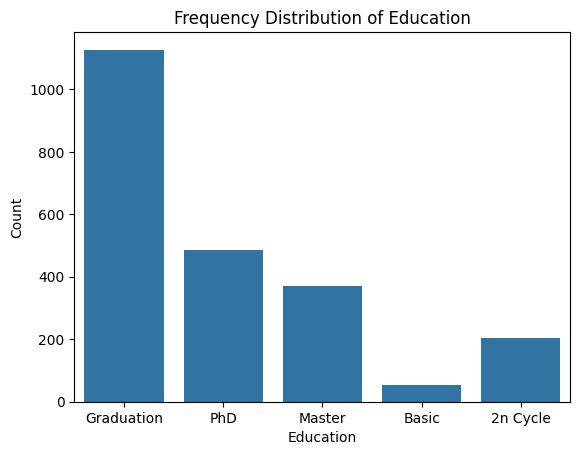

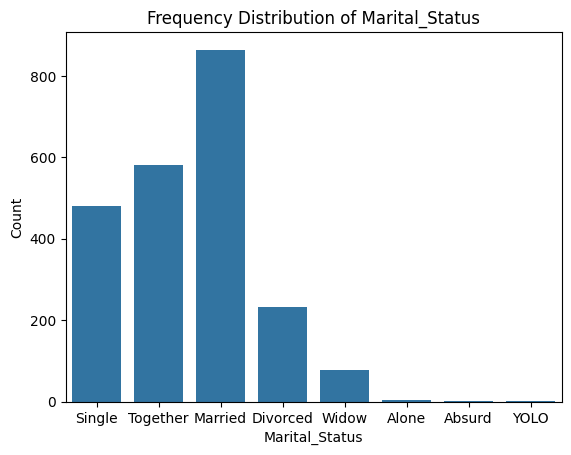

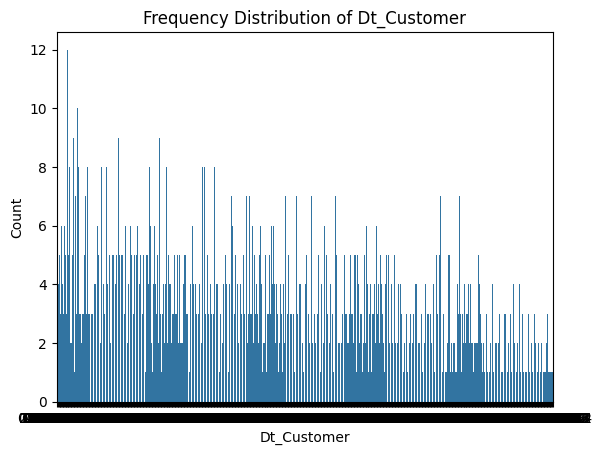

In [5]:
for feature in categorical_features:
  sns.countplot(data=df , x=feature)
  plt.title(f'Frequency Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.show()

Extracting numerical features

In [6]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
df[numerical_features].head()
df[numerical_features].info()
df[numerical_features].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]



```
Observation : these features (Z_CostContact , Z_Revenue) has zero std , thats indicates there is no variation in the data for these features
```



In [7]:
discrete_features = [feature for feature in df.columns if df[feature].dtype == 'int64']
df[discrete_features].head()
df[discrete_features].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2240 non-null   int64
 1   Year_Birth           2240 non-null   int64
 2   Kidhome              2240 non-null   int64
 3   Teenhome             2240 non-null   int64
 4   Recency              2240 non-null   int64
 5   MntWines             2240 non-null   int64
 6   MntFruits            2240 non-null   int64
 7   MntMeatProducts      2240 non-null   int64
 8   MntFishProducts      2240 non-null   int64
 9   MntSweetProducts     2240 non-null   int64
 10  MntGoldProds         2240 non-null   int64
 11  NumDealsPurchases    2240 non-null   int64
 12  NumWebPurchases      2240 non-null   int64
 13  NumCatalogPurchases  2240 non-null   int64
 14  NumStorePurchases    2240 non-null   int64
 15  NumWebVisitsMonth    2240 non-null   int64
 16  AcceptedCmp3         224

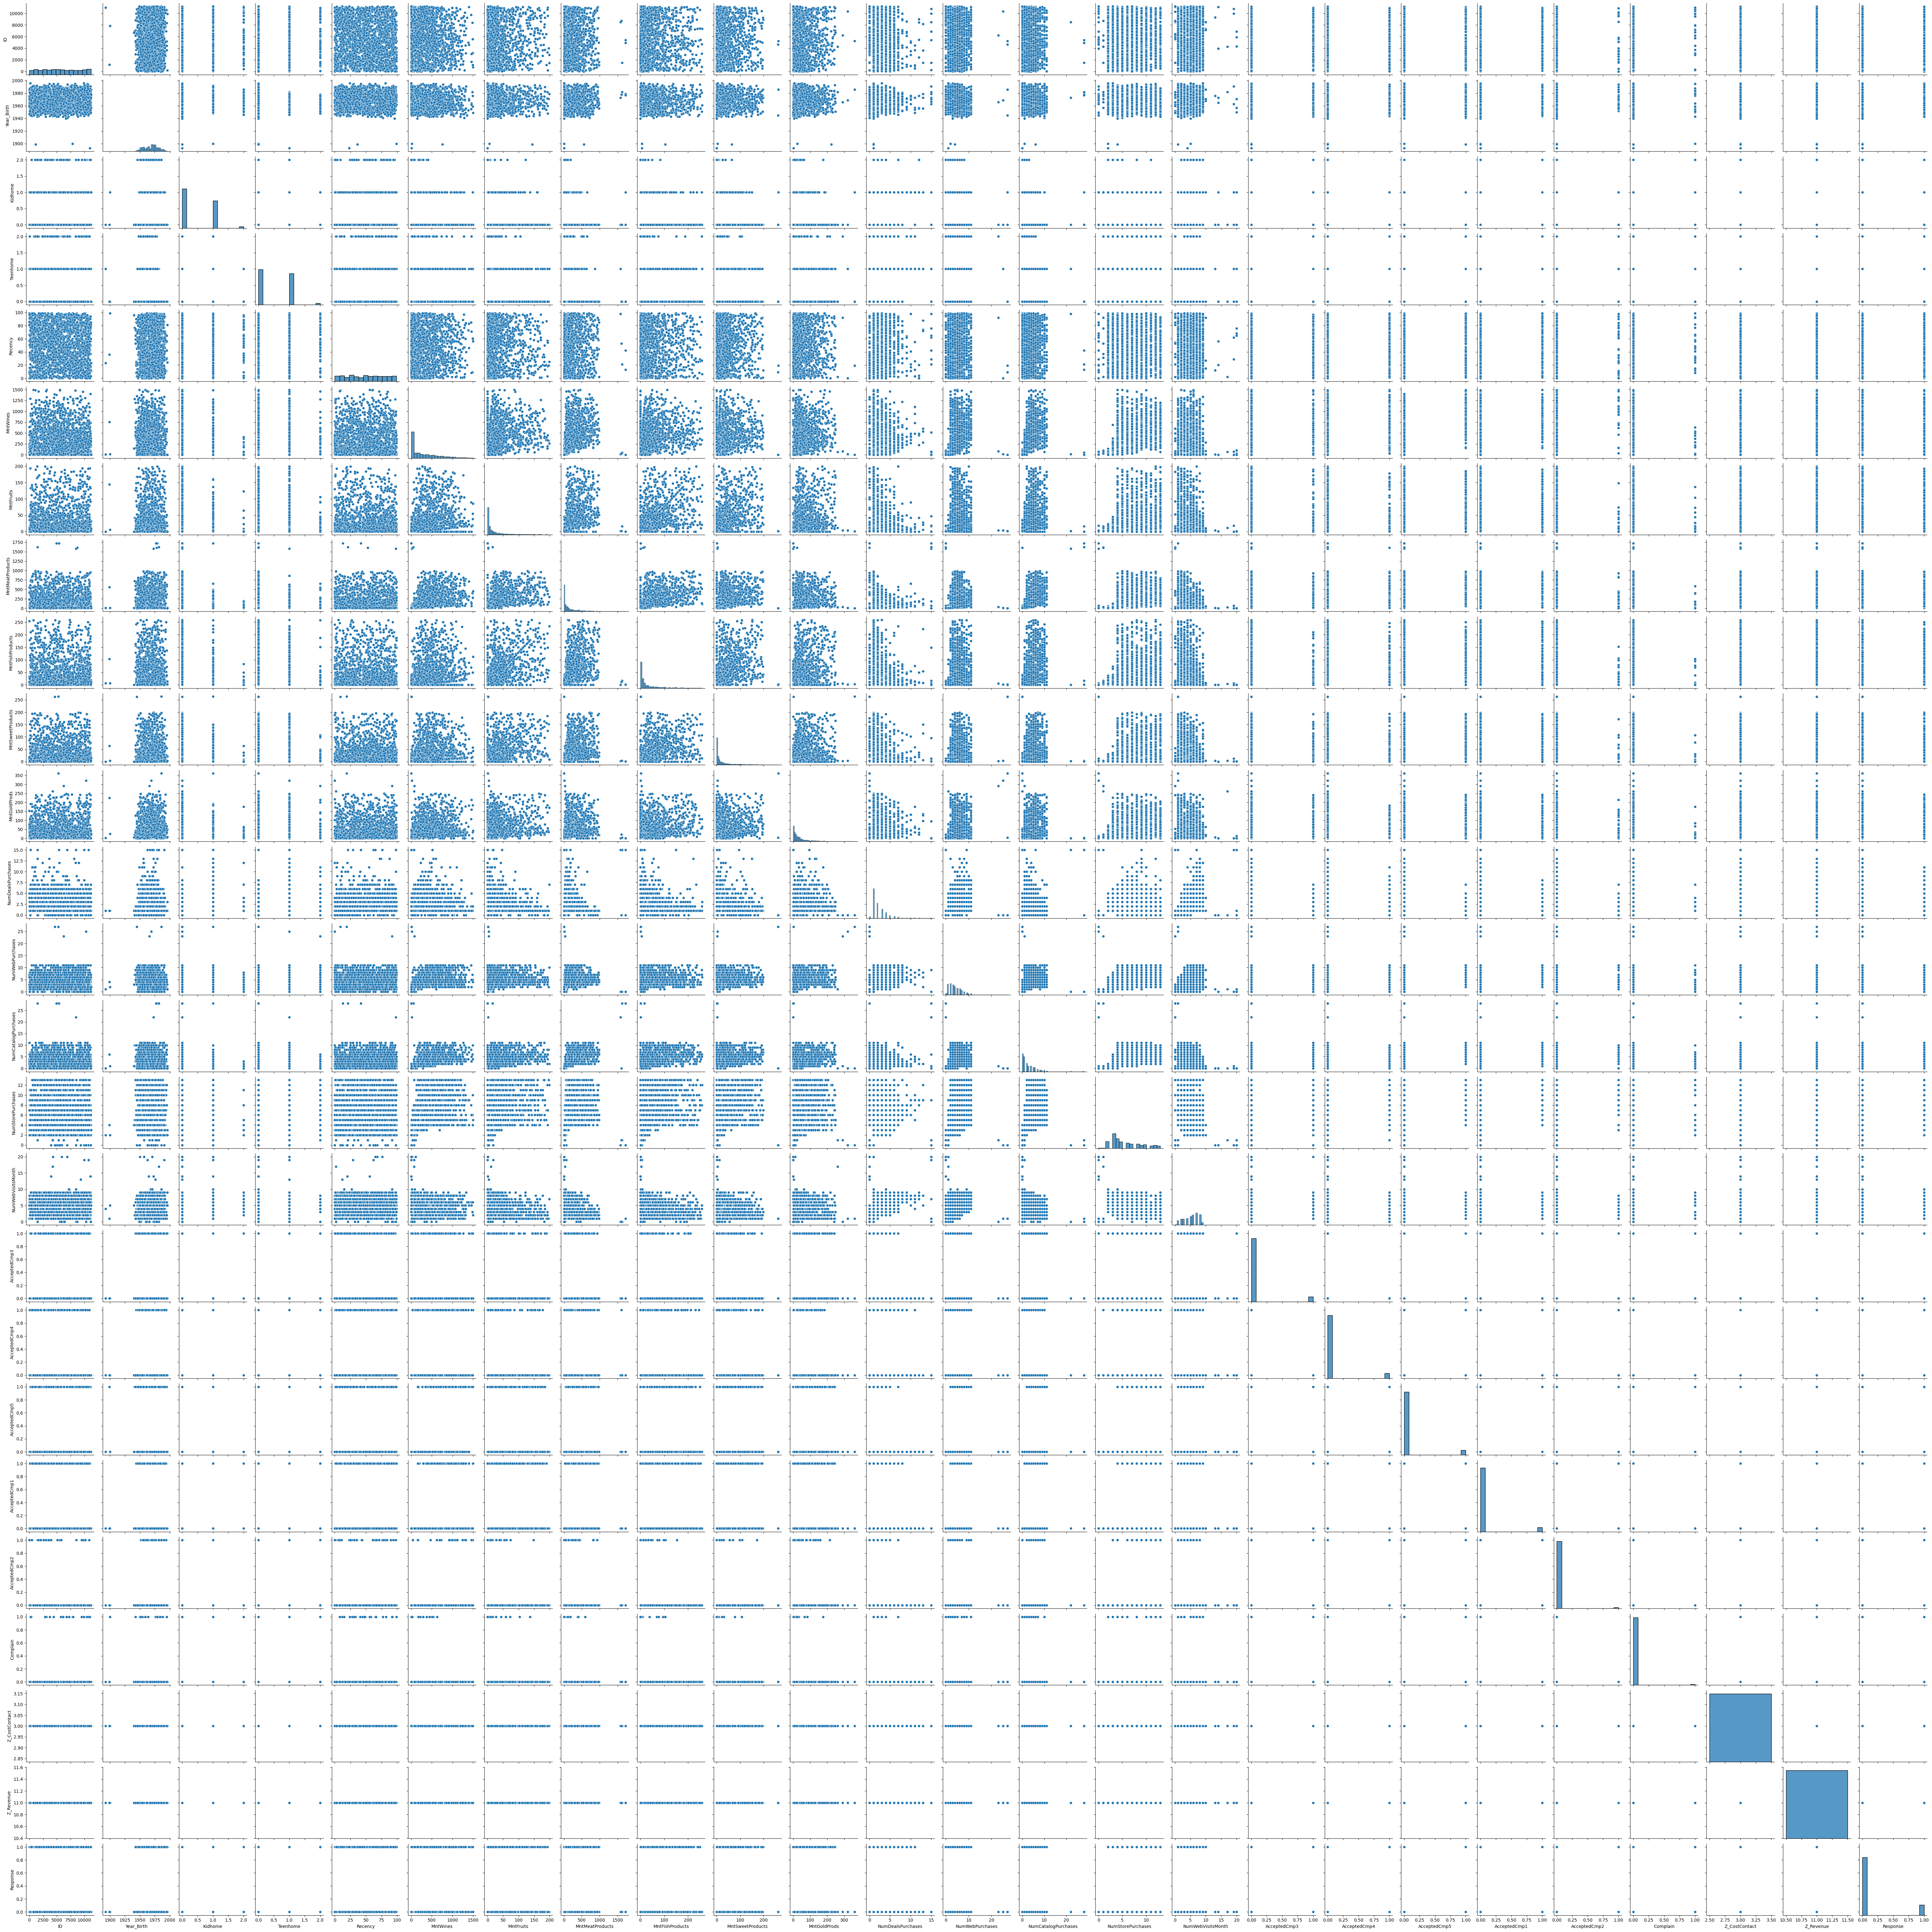

In [8]:
sns.pairplot(df[discrete_features])

In [9]:
continious_features = [feature for feature in numerical_features if feature not in discrete_features]
df[continious_features].head()

Income
0  58138.0
1  46344.0
2  71613.0
3  26646.0
4  58293.0

<Axes: ylabel='Count'>

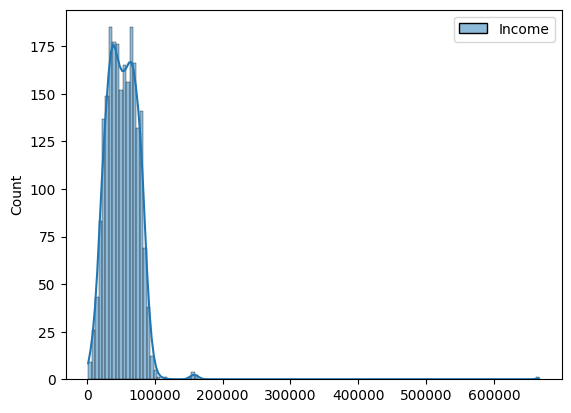

In [10]:
sns.histplot(df[continious_features],kde=True)

Checking for Outliers

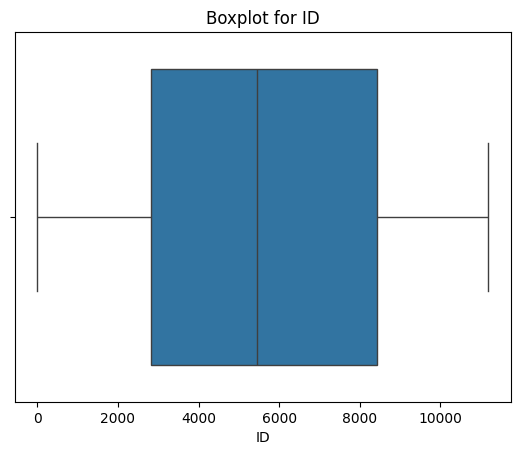

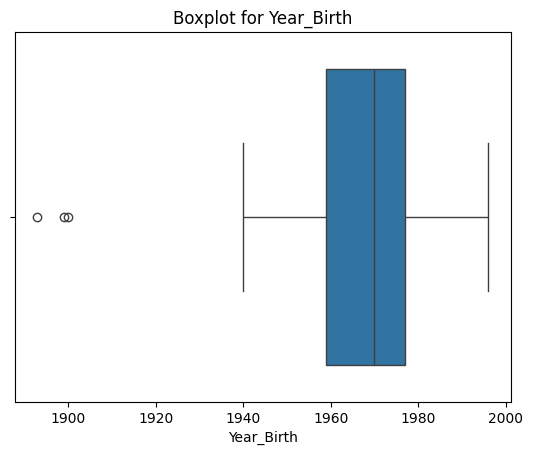

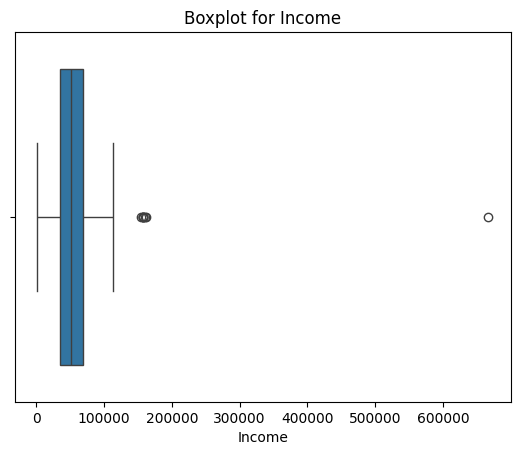

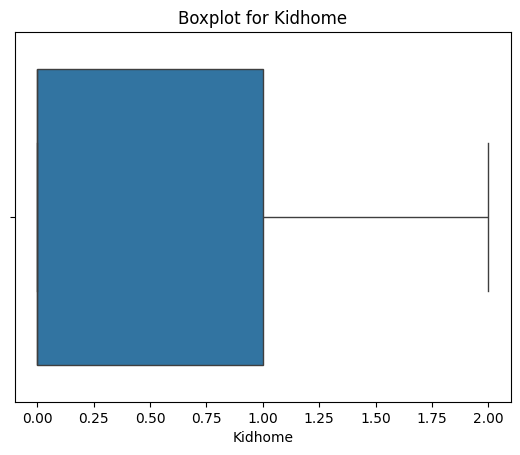

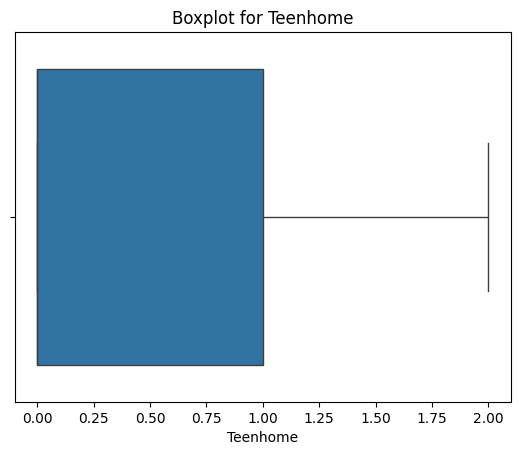

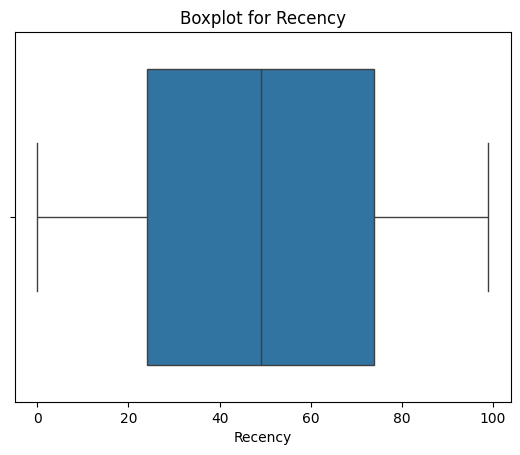

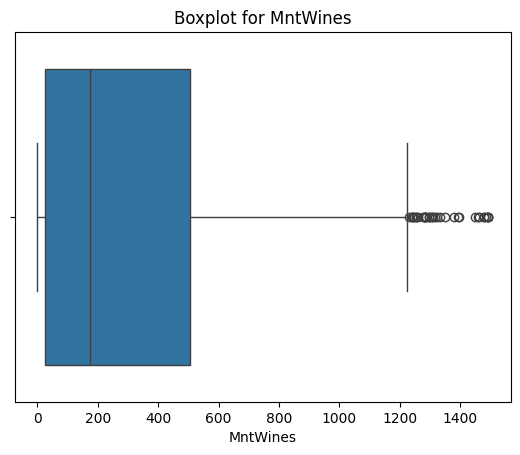

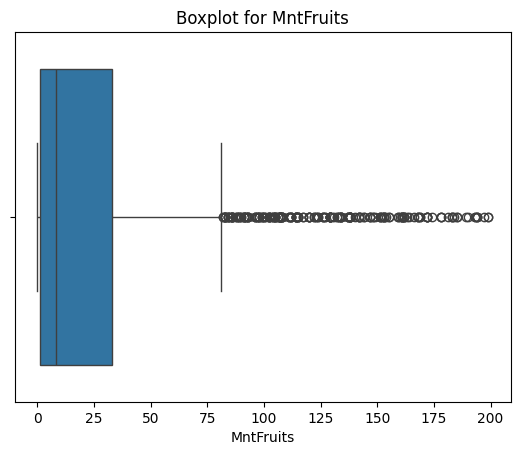

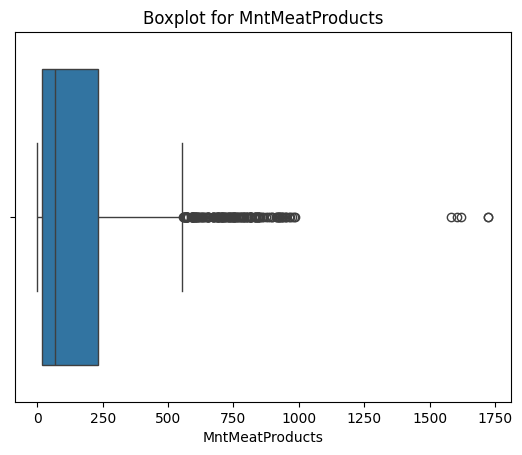

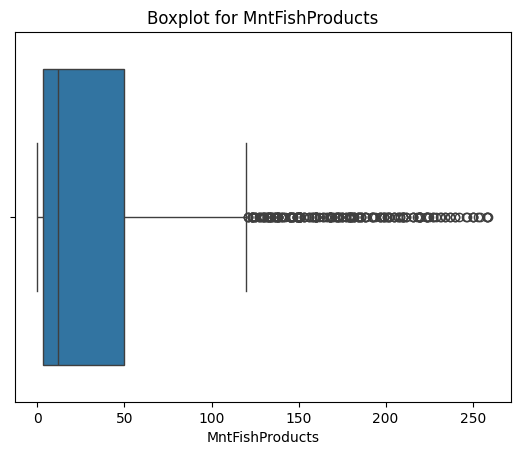

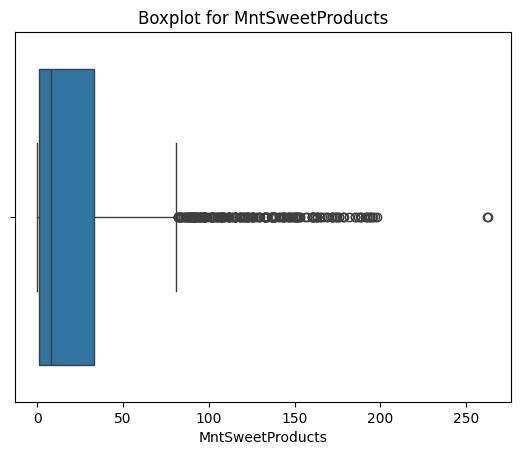

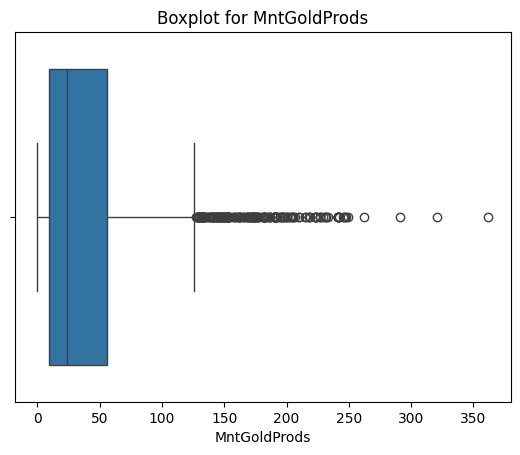

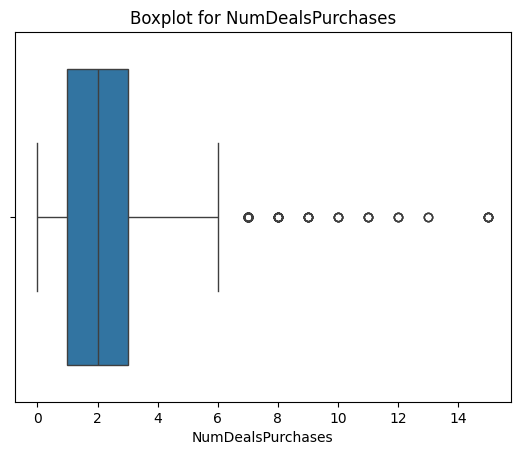

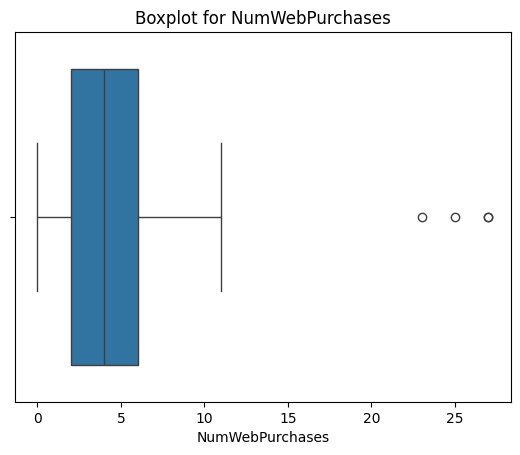

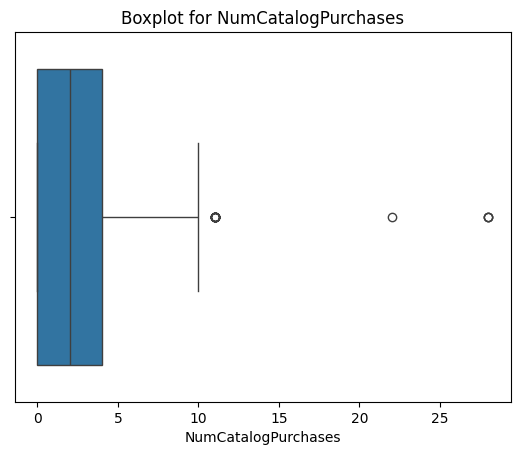

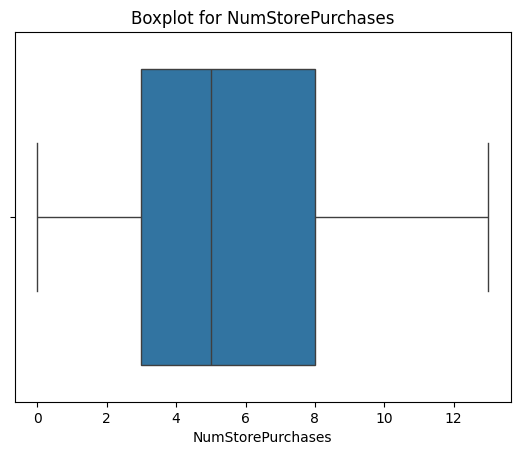

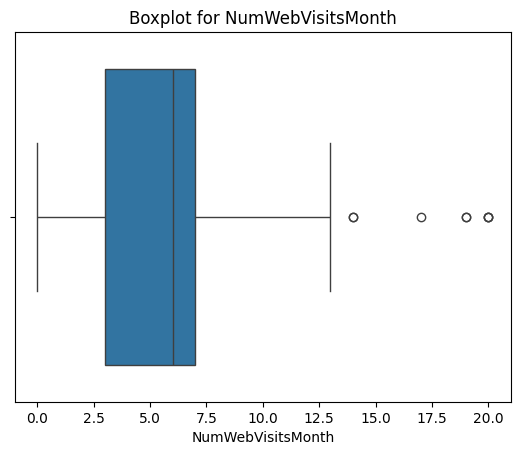

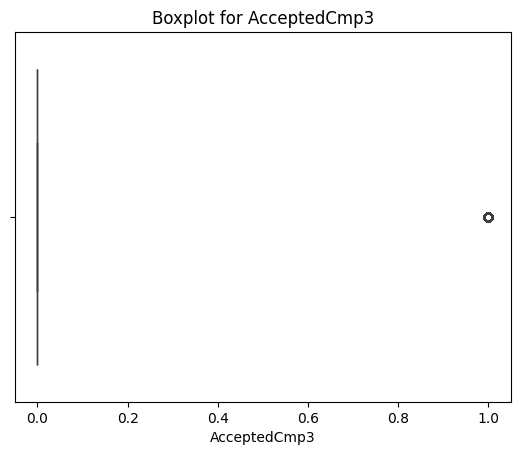

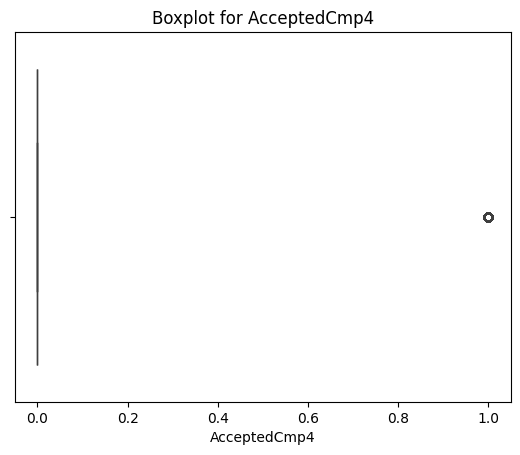

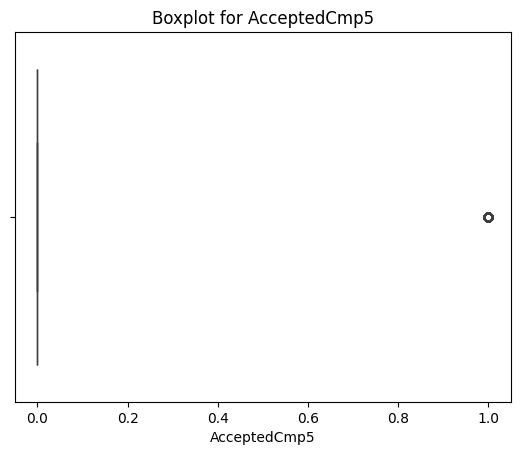

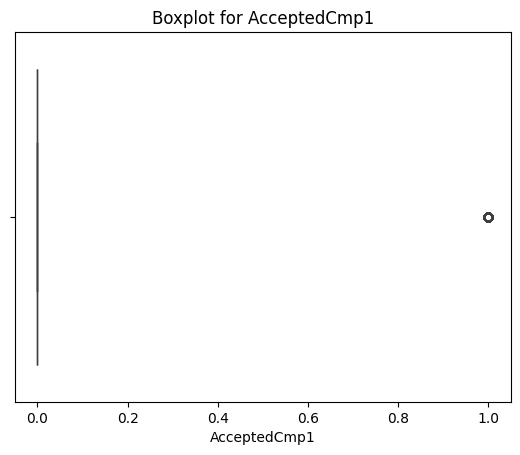

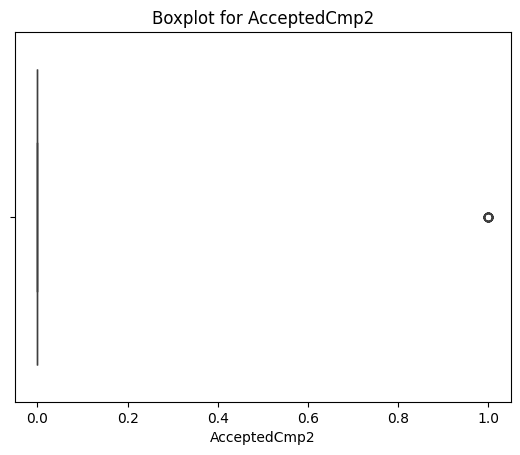

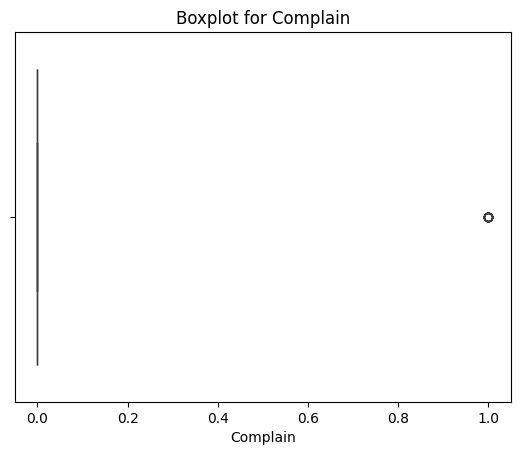

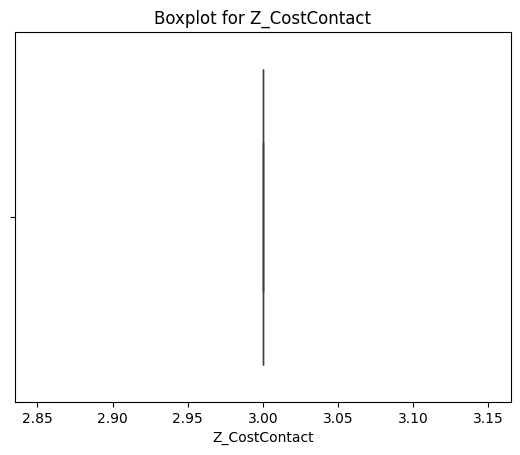

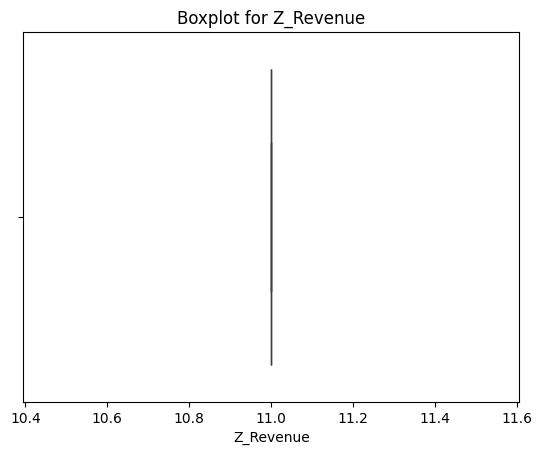

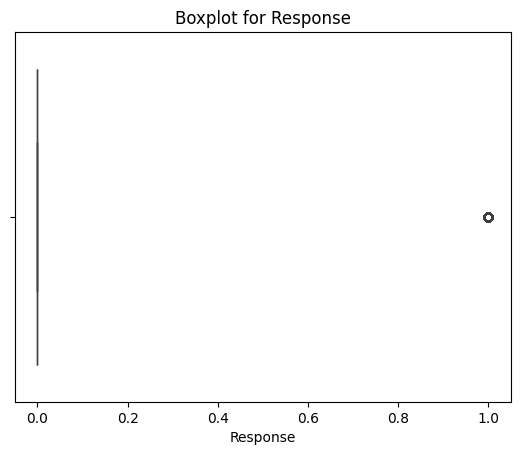

In [11]:
for feature in numerical_features:

        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot for {feature}')
        plt.show()








```
Observation : the data has too many outliers
```



Correlation

<Axes: >

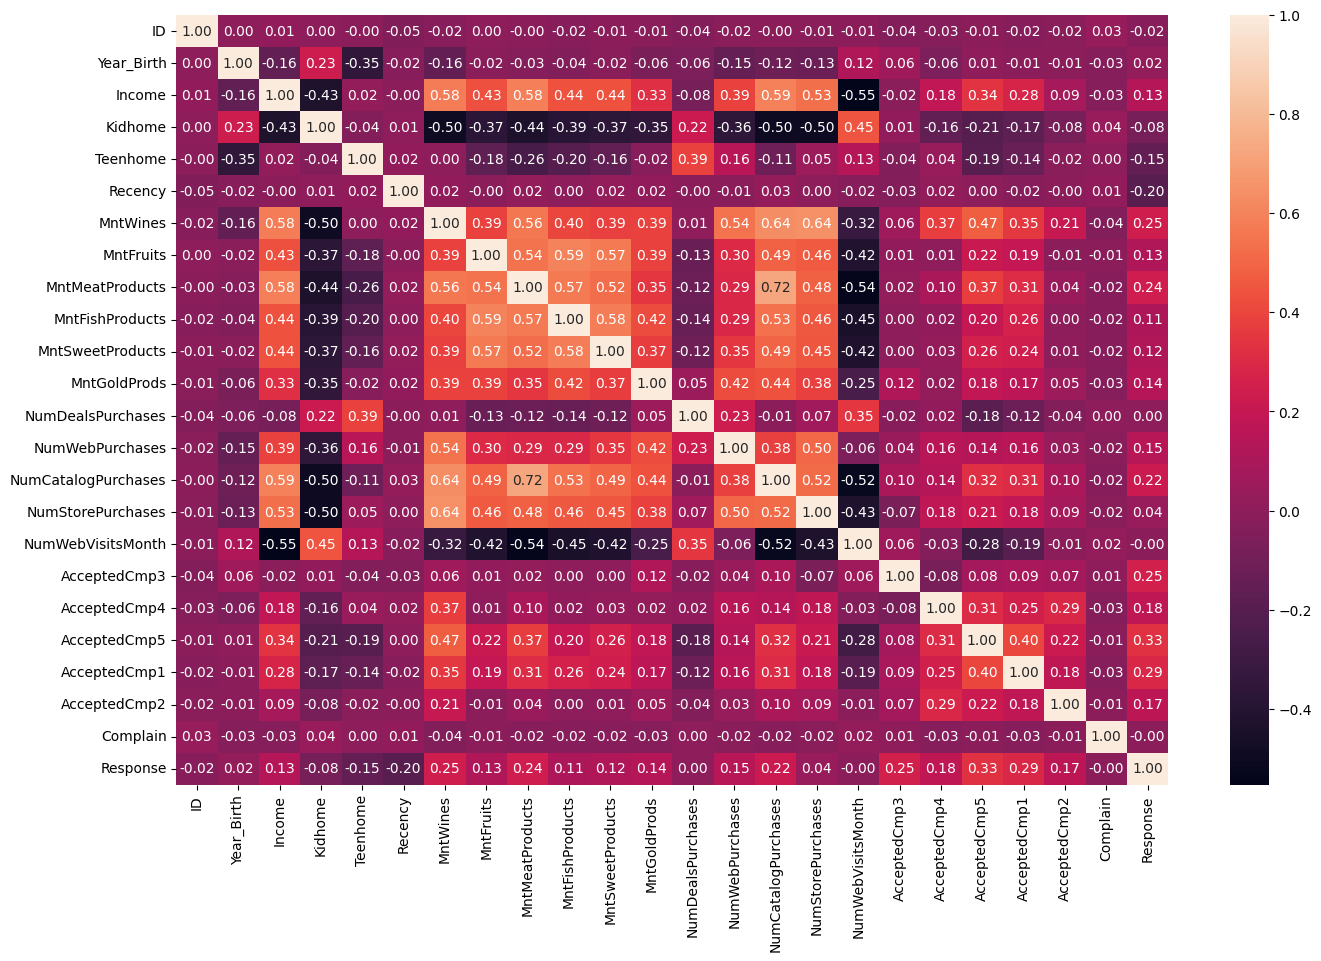

In [12]:
std_devs = df[numerical_features].std()
zero_std_features = std_devs[std_devs == 0].index
feature_to_correlation = [feature for feature in numerical_features if feature not in zero_std_features]
correlation_matrix = df[feature_to_correlation].corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True ,fmt='.2f')

Since we are working with an unsupervised learning technique, doesn't rely on resampling like classification tasks,which clusters are not predefined ,so their is no need to check if the data is balanced here

**Feature** **Engineering**

Dealing with unimportant features and Missing values

In [13]:
df.drop('ID',axis=1,inplace=True)
df.drop(zero_std_features,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [14]:
df.isnull().sum()
df['Income'].fillna(df['Income'].median(),inplace=True)
df.isnull().sum()

<ipython-input-14-6ff365d258fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(),inplace=True)


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64



```filling Missing values with median because the data has too many outliers
```





```
filling data with the median because the data has too many outliers
```



Feature Extraction

In [15]:
df['Dt_Customer'].head()
df['day_customer'] = df['Dt_Customer'].str.split('-').str[0]
df['month_customer'] = df['Dt_Customer'].str.split('-').str[1]
df['year_customer'] = df['Dt_Customer'].str.split('-').str[2]

df['day_customer'] = df['day_customer'].astype(int)
df['month_customer'] = df['month_customer'].astype(int)
df['year_customer'] = df['year_customer'].astype(int)

df.drop('Dt_Customer' ,axis=1 , inplace=True)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

Feature Transformation

In [16]:
new_numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
binary_features = [feature for feature in new_numerical_features if df[feature].nunique() == 2]
features_to_normalize = [feature for feature in new_numerical_features if feature not in binary_features]

from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
df[features_to_normalize] = normalizer.fit_transform(df[features_to_normalize])
df[new_numerical_features].head()

Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0   -0.985345  0.235696 -0.825218 -0.929894  0.307039  0.983781   1.551577   
1   -1.235733 -0.235454  1.032559  0.906934 -0.383664 -0.870479  -0.636301   
2   -0.317643  0.773999 -0.825218 -0.929894 -0.798086  0.362723   0.570804   
3    1.268149 -1.022355  1.032559 -0.929894 -0.798086 -0.870479  -0.560857   
4    1.017761  0.241888  1.032559 -0.929894  1.550305 -0.389085   0.419916   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp3  \
0         1.679702         2.462147          1.476500  ...             0   
1        -0.713225        -0.650449         -0.631503  ...             0   
2        -0.177032         1.345274         -0.146905  ...             0   
3        -0.651187        -0.503974         -0.583043  ...             0   
4        -0.216914         0.155164         -0.001525  ...             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   day_customer  month_customer  year_customer  
0     -1.324242        0.726520      -1.502225  
1     -0.869113       -0.994691       1.420036  
2      0.610056        0.439652      -0.041094  
3     -0.641549       -1.281560       1.420036  
4      0.382491       -1.568428       1.420036  

[5 rows x 26 columns]

Handling Categorical features

In [17]:
new_categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
df[new_categorical_features].nunique()
df['Education'].unique()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Education'] = encoder.fit_transform(df['Education'])
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   float64
 1   Education            2240 non-null   int64  
 2   Marital_Status       2240 non-null   int64  
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   float64
 5   Teenhome             2240 non-null   float64
 6   Recency              2240 non-null   float64
 7   MntWines             2240 non-null   float64
 8   MntFruits            2240 non-null   float64
 9   MntMeatProducts      2240 non-null   float64
 10  MntFishProducts      2240 non-null   float64
 11  MntSweetProducts     2240 non-null   float64
 12  MntGoldProds         2240 non-null   float64
 13  NumDealsPurchases    2240 non-null   float64
 14  NumWebPurchases      2240 non-null   float64
 15  NumCatalogPurchases  2240 non-null   f

Handling Outliers

In [18]:
for feature in df.columns:
    data = df[feature]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5* IQR
    upper_limit = Q3 + 1.5*IQR
    df[feature] = np.where(df[feature] < lower_limit, lower_limit, df[feature])


**Modeling**

In [19]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV , train_test_split

x_train , x_test = train_test_split(df,test_size=0.2 , random_state=10)

model = KMeans()

parameters = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-5, 1e-6],
    'algorithm': ['auto', 'full', 'elkan']
}

grid_search = GridSearchCV(estimator=model , param_grid=parameters ,cv=3 ,n_jobs=-1)
grid_search.fit(x_train)
print(f'best parameters : {grid_search.best_params_}')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1512 fits failed out of a total of 2268.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
389 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 864, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_para

best parameters : {'algorithm': 'elkan', 'init': 'random', 'max_iter': 300, 'n_clusters': 8, 'n_init': 10, 'tol': 0.0001}


In [21]:
k_mean_model = KMeans(
    algorithm='elkan',
    init='random',
    max_iter=300,
    n_clusters=8,
    n_init=10,
    tol=0.0001
)

k_mean_model.fit(x_train)
predicted_values = k_mean_model.predict(x_test)
predicted_values

array([0, 5, 2, 0, 7, 5, 1, 3, 3, 2, 4, 6, 1, 4, 0, 2, 0, 1, 2, 7, 1, 2,
       4, 2, 2, 4, 1, 0, 0, 4, 5, 2, 0, 0, 5, 7, 1, 0, 3, 2, 3, 6, 2, 6,
       2, 6, 3, 0, 1, 2, 0, 5, 6, 1, 0, 4, 0, 0, 7, 6, 3, 1, 7, 5, 4, 6,
       0, 4, 6, 5, 7, 6, 5, 1, 3, 5, 5, 7, 1, 6, 4, 0, 1, 5, 0, 2, 0, 2,
       1, 1, 4, 4, 0, 4, 0, 0, 0, 0, 1, 6, 0, 0, 1, 7, 1, 2, 4, 7, 7, 4,
       0, 3, 5, 7, 0, 7, 6, 5, 0, 4, 2, 7, 1, 1, 7, 7, 0, 5, 4, 6, 5, 7,
       2, 1, 7, 1, 5, 2, 2, 3, 6, 5, 4, 4, 4, 0, 7, 6, 5, 5, 6, 5, 6, 1,
       3, 0, 2, 5, 7, 1, 3, 3, 1, 4, 2, 5, 6, 0, 5, 1, 5, 6, 1, 0, 1, 6,
       1, 7, 0, 4, 6, 5, 1, 1, 7, 1, 6, 1, 1, 0, 6, 1, 1, 5, 7, 6, 7, 6,
       7, 0, 3, 1, 0, 1, 5, 6, 1, 6, 6, 6, 2, 2, 6, 4, 1, 4, 4, 4, 1, 6,
       4, 5, 6, 6, 2, 0, 3, 4, 1, 4, 3, 6, 0, 6, 1, 4, 6, 0, 1, 4, 1, 2,
       3, 4, 1, 6, 0, 0, 1, 6, 3, 7, 6, 1, 0, 1, 6, 0, 6, 4, 5, 3, 4, 2,
       0, 2, 5, 7, 4, 4, 6, 7, 1, 1, 0, 2, 1, 2, 7, 3, 3, 5, 6, 7, 1, 5,
       4, 0, 7, 1, 7, 1, 0, 0, 5, 0, 0, 1, 1, 5, 4,

**Model Evaluation**

Elbow method

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1400: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


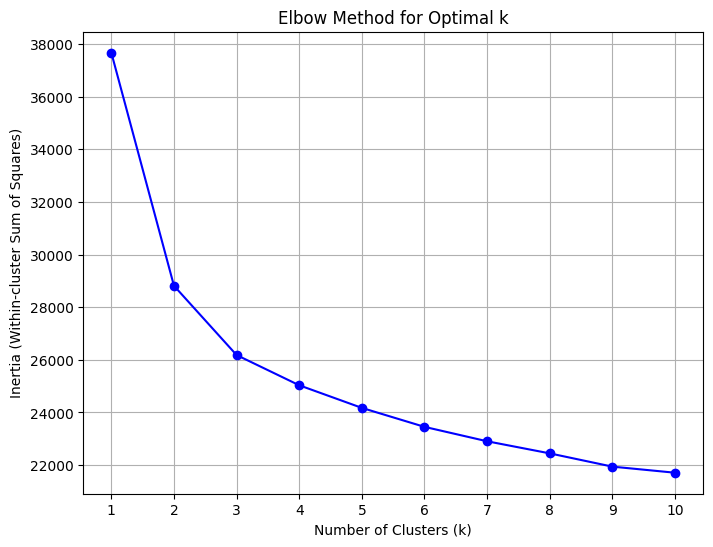

In [24]:
k_range = range(1, 11)
inertia_values = []

for k in k_range:
    kmeans = KMeans(
    algorithm='elkan',
    init='random',
    max_iter=300,
    n_clusters=k,
    n_init=10,
    tol=0.0001
)
    kmeans.fit(x_train)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.xticks(k_range)
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


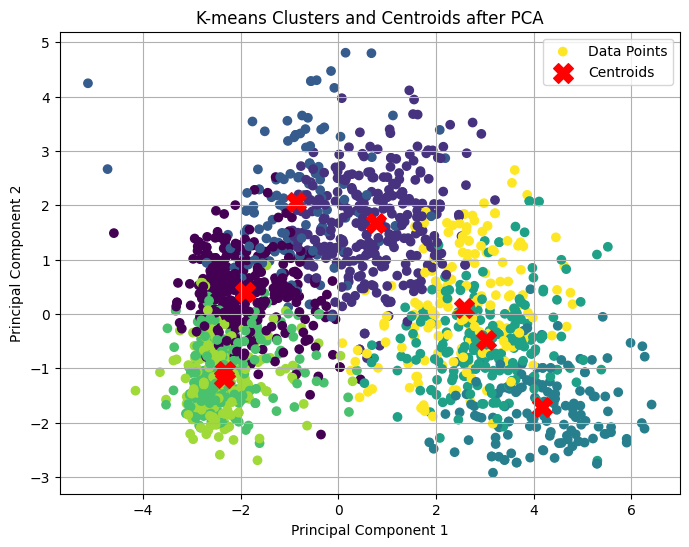

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

predicted_labels = k_mean_model.predict(x_train)

centroids = k_mean_model.cluster_centers_

plt.figure(figsize=(8, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', label='Data Points')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title("K-means Clusters and Centroids after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()



Clustering metrcis

In [30]:
from sklearn.metrics import silhouette_score

print("Inertia :", k_mean_model.inertia_)
silhouette = silhouette_score(x_train, k_mean_model.labels_)
print(f"Silhouette Score: {silhouette}")

Inertia : 22487.782506105523
Silhouette Score: 0.07378362601464952
